# 4 - Dados Ausentes - Missing Data

Precisamos lidar com dados perdidos. O capítulo anterior

mostrou um exemplo. Este capítulo vai mergulhar um pouco mais nele.

A maioria dos algoritmos não funcionará se houver dados ausentes.


__Há também várias maneiras de lidar com dados ausentes:__

1. Remova qualquer linha com dados ausentes

2. Remova qualquer coluna com dados ausentes

3. Atribuir valores ausentes

4. Crie uma coluna de indicador para indicar que os dados foram incorretos

In [1]:
# bibliotecas de manipulação de dados

import pandas as pd 
import numpy as np
import janitor as jn

#Visualização

import matplotlib.pyplot as plt

In [2]:
# Coletando os dados

url = "https://hbiostat.org/data/repo/titanic3.xls"
df = pd.read_excel(url).clean_names()
orig_df = pd.read_excel(url).clean_names()


## 4.1 - Examinando dados ausentes

Vamos voltar aos dados do Titanic. Porque Python trata  e False como 1 e 0, respectivamente, podemos usar esse truque em pandas para obter a porcentagem de dados ausentes:

In [5]:
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home_dest    43.086325
dtype: float64

# 4.2 - Dados ausentes

Para visualizar padrões nos dados ausentes, use a biblioteca `missingno`. Essa biblioteca é útil para visualizar áreas contíguas de dados __missing__, o que indicaria que os dados ausentes não são aleatórios (consulte a Figura 4-1). A função de matriz inclui uma linha de brilho ao longo do lado direito. Padrões aqui também indicariam ausência de dados aleatórios. Pode ser necessário limitar o número de amostras para poder ver os padrões:

Text(0.5, 1.0, 'Figura 4-1')

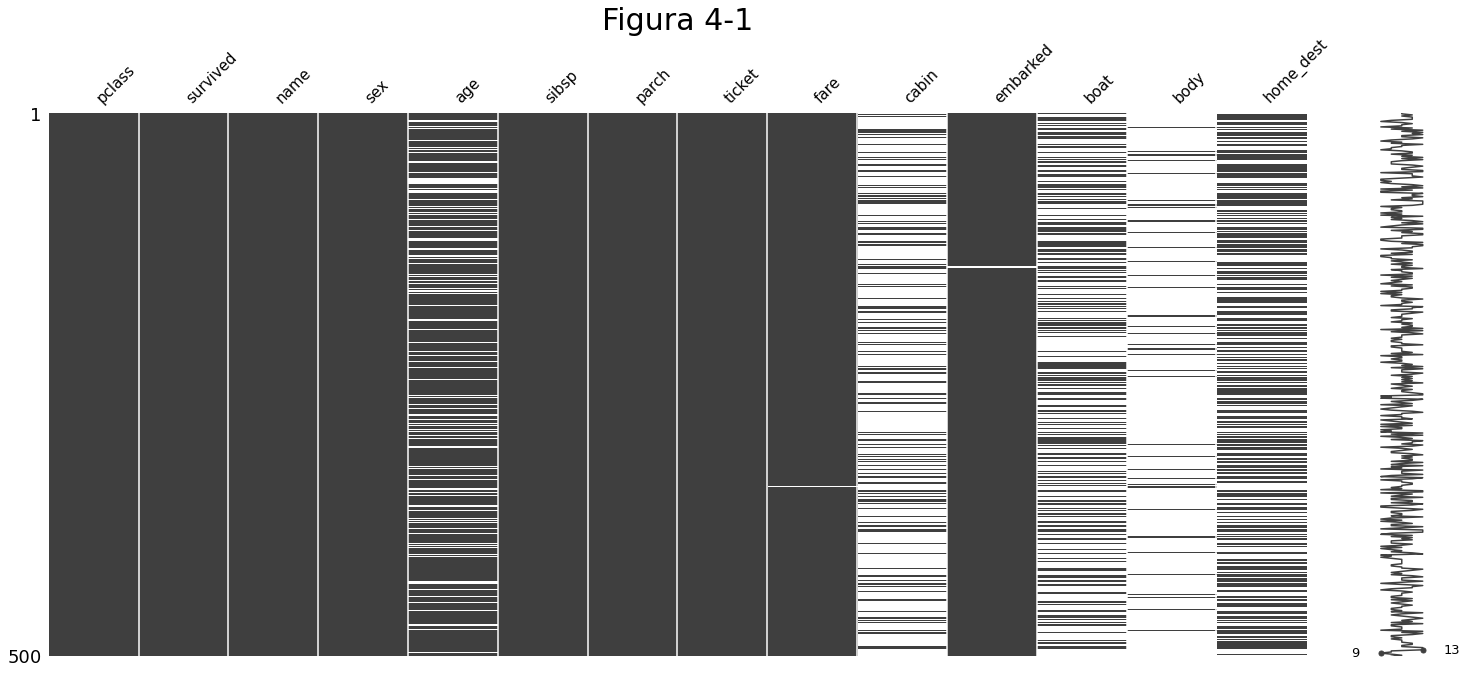

In [4]:
import missingno as msno

ax = msno.matrix(orig_df.sample(500), fontsize=15)
ax.get_figure().savefig(r"../visualizion/mlpr_0401.png")
plt.title("Figura 4-1", fontsize=30)

Podemos criar um gráfico de barras de contagens de dados ausentes usando pandas

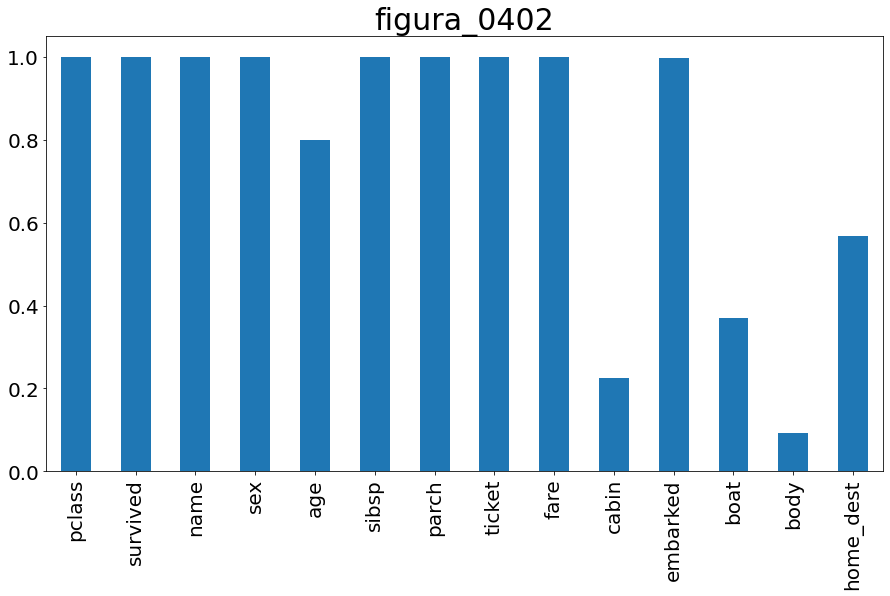

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax, fontsize=20)
plt.title("figura_0402", fontsize=30)
fig.savefig(r"../visualizion//figura_0402.png") 



__Atenção:__ Porcentagem de dados 'não ausentes' com pandas. O barco e o corpo estão com vazamento, então devemos ignorá-los. Interessante que algumas idades estão faltando.

Ou use a biblioteca missingno para criar o mesmo gráfico (veja a Figura 4-3):

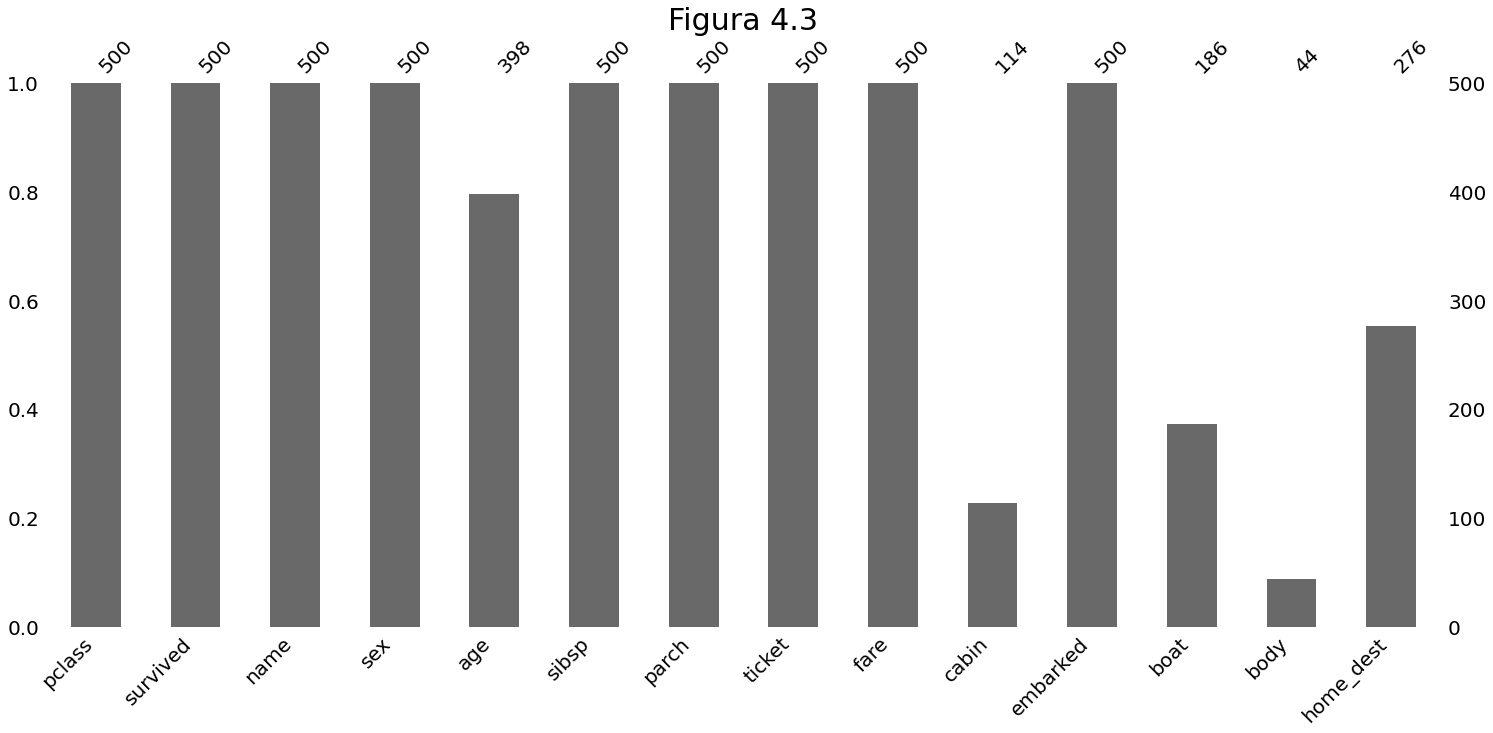

In [7]:
ax = msno.bar(orig_df.sample(500), fontsize=20)
plt.title("Figura 4.3", fontsize=30)
plt.savefig(r"../visualizion/figura_0403.png")

Podemos criar um mapa de calor mostrando se há correlações onde faltam dados (veja a Figura 4-4). Neste caso, __não parece que os locais onde os dados estão faltando estão correlacionados:__


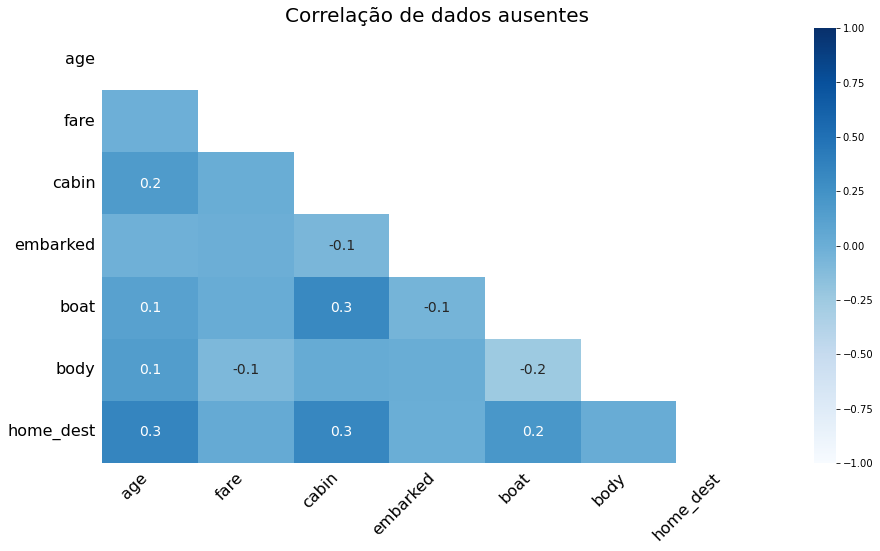

In [51]:
ax = msno.heatmap(df, figsize=(15,8),  vmin=-1, vmax=1, cmap= 'Blues')
plt.title("Correlação de dados ausentes", fontsize=20)
plt.savefig(r"../visualizion/figura_0404.png")

Podemos criar um dendrograma mostrando os agrupamentos de onde os dados estão faltando (veja a Figura 4-5). Folhas que estão no mesmo nível predizem a presença umas das outras (vazias ou cheias). Os braços verticais são usados para indicar como os clusters são diferentes. Braços curtos significam que os ramos são semelhantes:

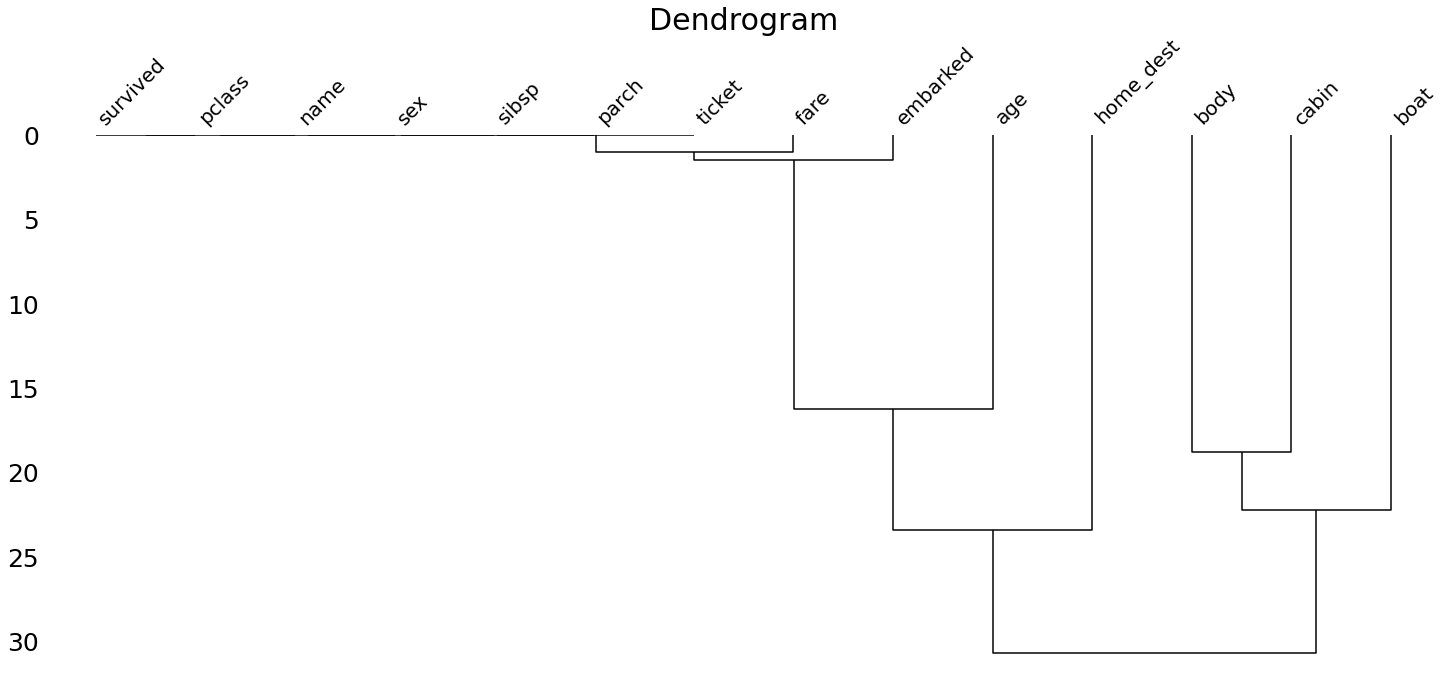

In [13]:
ax = msno.dendrogram(df, fontsize=20)
plt.title("Dendrogram", fontsize=30)
ax.get_figure().savefig(r"../visualizion/Figura_0405.png")


__Atenção:__ Dendrograma de dados ausentes com __missingo__. Podemos ver as colunas sem dados ausentes no canto superior esquerdo.

# 4.3 - Descatadno dados ausentes